In [1]:
import os

import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
directory = "/Volumes/PortableSSD/kreta_cleaned_export"

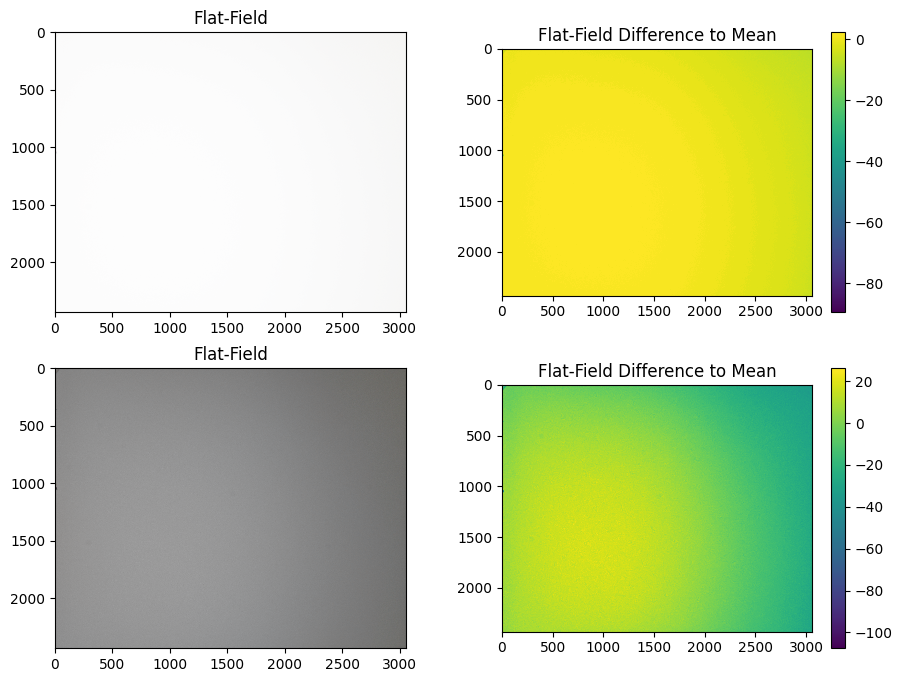

In [5]:
flatfield1 = cv2.imread(os.path.join(directory, "frame-03630-flatfield-01.tif"))
flatfield1 = cv2.cvtColor(flatfield1, cv2.COLOR_BGR2RGB)
diff1 = flatfield1.mean(axis=2) - flatfield1.mean()

flatfield2 = cv2.imread(os.path.join(directory, "frame-03630-flatfield-01b.tif"))
flatfield2 = cv2.cvtColor(flatfield2, cv2.COLOR_BGR2RGB)
diff2 = flatfield2.mean(axis=2) - flatfield2.mean()

plt.figure(figsize=(11,8))
plt.subplot(221)
plt.title("Flat-Field")
plt.imshow(flatfield1, interpolation="None")
plt.subplot(222)
plt.title("Flat-Field Difference to Mean")
plt.imshow(diff1, interpolation="None")
plt.colorbar()
plt.subplot(223)
plt.title("Flat-Field")
plt.imshow(flatfield2, interpolation="None")
plt.subplot(224)
plt.title("Flat-Field Difference to Mean")
plt.imshow(diff2, interpolation="None")
plt.colorbar()
plt.show()

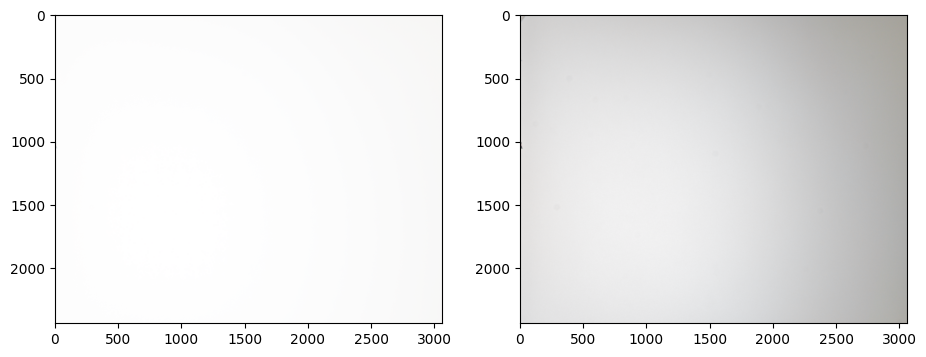

In [6]:
correction1 = flatfield1 / flatfield1.max()
correction2 = flatfield2 / flatfield2.max()

plt.figure(figsize=(11,4))
plt.subplot(121)
plt.imshow(correction1)
plt.subplot(122)
plt.imshow(correction2)
plt.show()

In [7]:
path = os.path.join(directory, "frame-02500.png")
frame = cv2.imread(path)
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

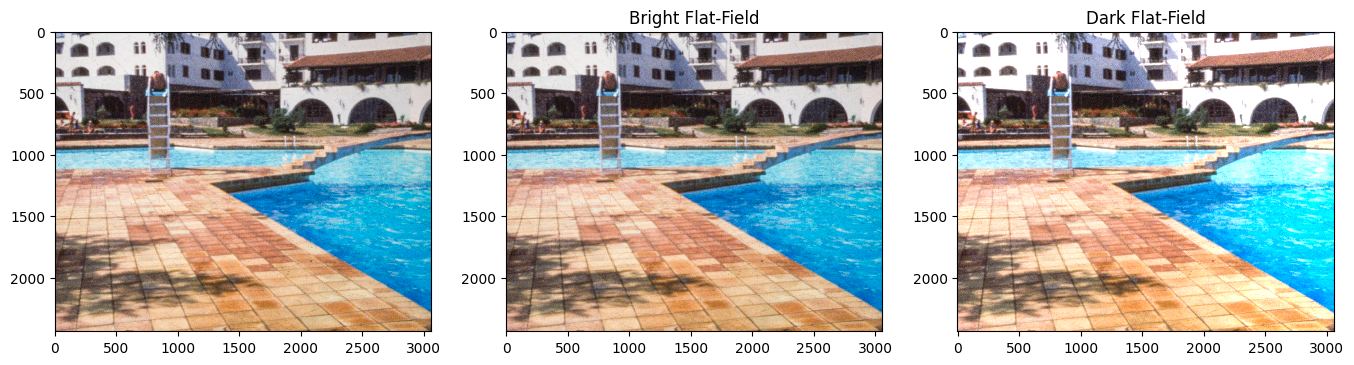

In [9]:
corrected1 = frame / correction1
corrected1 = (corrected1).clip(0, 255).astype(np.uint8)

corrected2 = frame / correction2
corrected2 = (corrected2).clip(0, 255).astype(np.uint8)

plt.figure(figsize=(16.5,4))
plt.subplot(131)
plt.imshow(frame, interpolation="None")
plt.subplot(132)
plt.title("Bright Flat-Field")
plt.imshow(corrected1, interpolation="None")
plt.subplot(133)
plt.title("Dark Flat-Field")
plt.imshow(corrected2, interpolation="None")
plt.show()

In [11]:
cv2.imwrite("/Users/jankaiser/Desktop/original.png", cv2.cvtColor(frame, cv2.COLOR_RGB2BGR))
cv2.imwrite("/Users/jankaiser/Desktop/corrected1.png", cv2.cvtColor(corrected1, cv2.COLOR_RGB2BGR))
cv2.imwrite("/Users/jankaiser/Desktop/corrected2.png", cv2.cvtColor(corrected2, cv2.COLOR_RGB2BGR))

True